In [ ]:
import pystac_client
import planetary_computer
import fsspec
import xarray as xr

catalog = pystac_client.Client.open("https://planetarycomputer-staging.microsoft.com/api/stac/v1")
gridmet = catalog.get_collection("gridmet")
asset = planetary_computer.sign(gridmet.assets["zarr-abfs"])

store = fsspec.get_mapper(asset.href, **asset.extra_fields["xarray:storage_options"])
ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
import cartopy.crs as ccrs

plt.style.use('dark_background')

In [3]:
chunk = ds["dead_fuel_moisture_100hr"][22].compute()

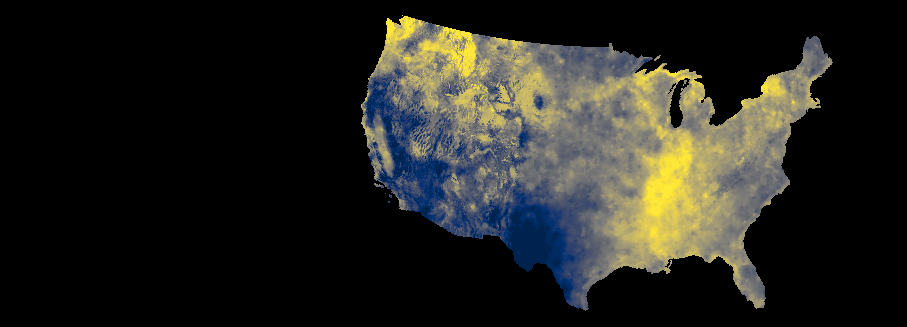

In [4]:
# 1800 x 460 @ 300 dpi
# Place the image in the top-right 1/3 to fit nicely
dpi = 300
w = 1800
h = 460

map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

fig = plt.figure(figsize=(16, 9))
gs = plt.GridSpec(100, 100)

ax1 = fig.add_subplot(gs[:, :25], projection=map_proj)
ax1.set_axis_off()

ax = fig.add_subplot(gs[:, 33:], projection=map_proj)
im = chunk.plot(ax=ax, add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree(), cmap="cividis", vmin=10, vmax=24);
ax.set_axis_off()
fig.savefig("gridmet-hero.png")